In [ ]:
Import danych i bibliotek

In [9]:
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_csv('tmdb_genres.csv')
df1 = pd.read_csv('tmdb_movies.csv')

df.columns = ['genre_id', 'genres']


1.Zwróć listę 10 najwyżej ocenianych filmów (vote_average), których liczba głosów (vote_count) jest większa od 3. kwartyla rozkładu liczby głosów.

In [10]:
third_quartile = df1['vote_count'].quantile(0.75)
popular_movies = df1[df1['vote_count'] > third_quartile]
top_rated_movies = popular_movies.nlargest(10, 'vote_average')
print(top_rated_movies['title'])

1881    The Shawshank Redemption
3337               The Godfather
662                   Fight Club
1818            Schindler's List
2294               Spirited Away
2731      The Godfather: Part II
3232                Pulp Fiction
3865                    Whiplash
65               The Dark Knight
690               The Green Mile
Name: title, dtype: object


2.Pogrupuj tabelę w taki sposób, aby otrzymać średni przychód (revenue) oraz średni budżet (budget) w danym roku dla filmów opublikowanych od 2010 (włącznie) do 2016

In [11]:
df1['release_date'] = pd.to_datetime(df1['release_date'])
df1['release_year'] = df1['release_date'].dt.year

grouped_data = df1[(df1['release_year'] >= 2010) & (df1['release_year'] <= 2016)].groupby('release_year').mean()

print(grouped_data[['revenue','budget']])

                   revenue        budget
release_year                            
2010.0        9.043811e+07  3.449541e+07
2011.0        9.200413e+07  3.477232e+07
2012.0        1.160659e+08  3.492203e+07
2013.0        1.013485e+08  3.552329e+07
2014.0        1.013466e+08  3.095989e+07
2015.0        1.054399e+08  3.113216e+07
2016.0        1.390496e+08  4.570327e+07


 Następnie na tej podstawie stwórz wykres, w którym średnie przychody są wykresem kolumnowym, a średni budżet wykresem liniowym na tych samych osiach. Sformatuj odpowiednio oś X oraz oś Y. Dodaj tytuł wykresu, oraz legendę, która znajduje się w prawym górnym rogu płótna, lecz poza obszarem osi. Przykład wykresu widoczny poniżej:

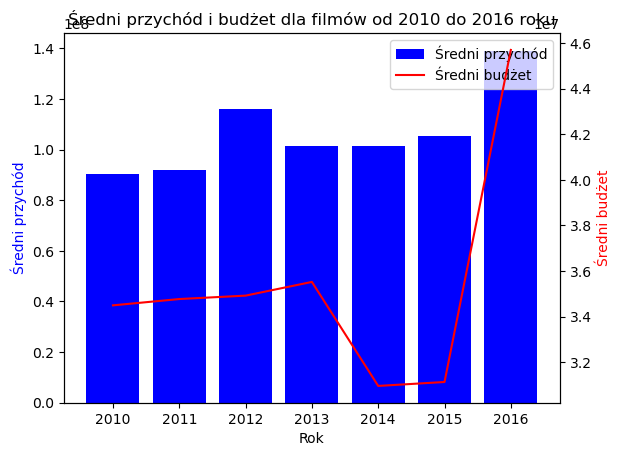

In [12]:
fig, ax1 = plt.subplots()

# Wykres kolumnowy dla średnich przychodów
ax1.bar(grouped_data.index, grouped_data['revenue'], color='b', label='Średni przychód')

# Ustawienie etykiet dla osi X i Y oraz tytułu wykresu
ax1.set_xlabel('Rok')
ax1.set_ylabel('Średni przychód', color='b')

# Wykres liniowy dla średniego budżetu
ax2 = ax1.twinx()
ax2.plot(grouped_data.index, grouped_data['budget'], color='r', label='Średni budżet')
ax2.set_ylabel('Średni budżet', color='r')

# Dodanie legendy
lines1, labels1 = ax1.get_legend_handles_labels()
lines2, labels2 = ax2.get_legend_handles_labels()
lines = lines1 + lines2
labels = labels1 + labels2
ax1.legend(lines, labels, loc='upper right')

# Formatowanie osi X
plt.xticks(grouped_data.index)
plt.xticks(rotation=45)

# Dodanie tytułu wykresu
plt.title('Średni przychód i budżet dla filmów od 2010 do 2016 roku')

plt.show()

3. Baza filmów zawiera kolumnę z id gatunku (genre_id). Na tej podstawie połącz ze sobą bazę filmów z bazą gatunków, tak aby w bazie filmów można było odczytać nazwę gatunku filmu.

In [13]:
merged_df = pd.merge(df, df1, on='genre_id', how='left')

print(merged_df)

      genre_id   genres  Unnamed: 0     budget  \
0         28.0   Action           0  237000000   
1         28.0   Action           2  245000000   
2         28.0   Action           3  250000000   
3         28.0   Action           4  260000000   
4         28.0   Action           7  280000000   
...        ...      ...         ...        ...   
4798       NaN      NaN        4714          0   
4799       NaN      NaN        4716          0   
4800       NaN      NaN        4801          0   
4801   10769.0  Foreign        4666     225000   
4802   10769.0  Foreign        4797          0   

                                               homepage      id  \
0                           http://www.avatarmovie.com/   19995   
1           http://www.sonypictures.com/movies/spectre/  206647   
2                    http://www.thedarkknightrises.com/   49026   
3                  http://movies.disney.com/john-carter   49529   
4     http://marvel.com/movies/movie/193/avengers_ag...   99861 

Jaki gatunek filmu z bazy pojawia się w niej najczęściej? Ile filmów tego gatunku znajduje się w bazie?

In [25]:
genre_counts = df['genres'].value_counts()

most_common_genre_id = genre_counts.idxmax()
most_common_genre_count = genre_counts.sum()

print("Najczęściej występujący gatunek filmu (ID):", most_common_genre_id)
print("Liczba filmów tego gatunku:", most_common_genre_count)

Najczęściej występujący gatunek filmu (ID): Action
Liczba filmów tego gatunku: 20


In [40]:
average_runtimes = merged_df.groupby('genre_id')['runtime'].mean()

# Wybór gatunku z najdłuższym średnim czasem trwania
most_runtime_genre = average_runtimes.idxmax()
most_runtime_average = average_runtimes.max()

print("Gatunek filmu z najdłuższym średnim czasem trwania:", most_runtime_genre)
print("Średni czas trwania tego gatunku:", most_runtime_average)


Gatunek filmu z najdłuższym średnim czasem trwania: 36.0
Średni czas trwania tego gatunku: 133.96


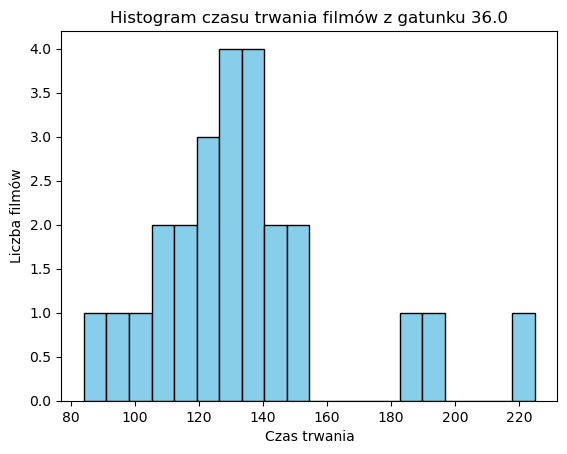

In [41]:
most_runtime_genre_films = merged_df[merged_df['genre_id'] == most_runtime_genre]


plt.hist(most_runtime_genre_films['runtime'], bins=20, color='skyblue', edgecolor='black')

plt.title(f'Histogram czasu trwania filmów z gatunku {most_runtime_genre}')
plt.xlabel('Czas trwania')
plt.ylabel('Liczba filmów')

plt.show()